In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.target.unique()

array([0, 1, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df.shape

(150, 5)

In [6]:
df['target_name'] = df['target'].map({0:'setosa', 1:'versicolor', 2: 'virginina'})

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Data Visualization and Exploration

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

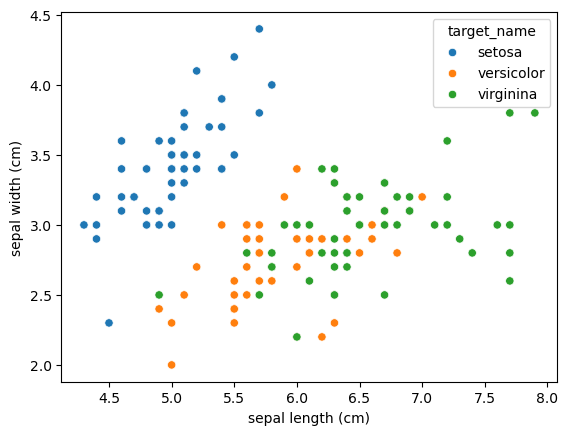

In [10]:
sns.scatterplot(df, x = 'sepal length (cm)', y= 'sepal width (cm)', hue = 'target_name')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

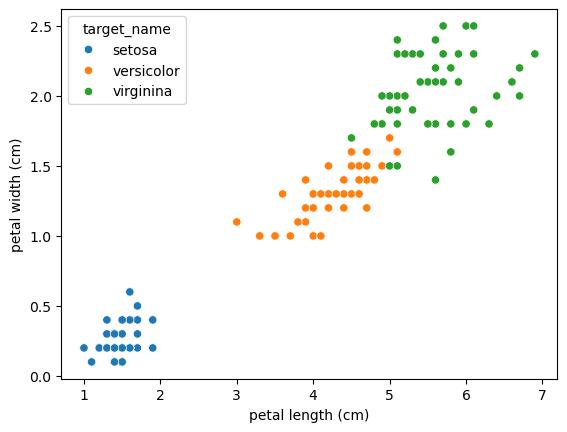

In [11]:
sns.scatterplot(df, x = 'petal length (cm)', y= 'petal width (cm)', hue = 'target_name')

### Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
X = df.drop(['target', 'target_name'], axis=1)
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation: Accuracy Score

In [17]:
model.score(X_test, y_test)

0.9777777777777777

In [18]:
y_preds = model.predict(X_test)
y_preds[:5]

array([1, 2, 2, 0, 2])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9777777777777777

In [20]:
y_test[:5]

82     1
134    2
114    2
42     0
109    2
Name: target, dtype: int64

### Model Evaluation: Precision, Recall, F1 Score

In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Model Evaluation: Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(0.5, 1.0, 'Confusion Matrix')

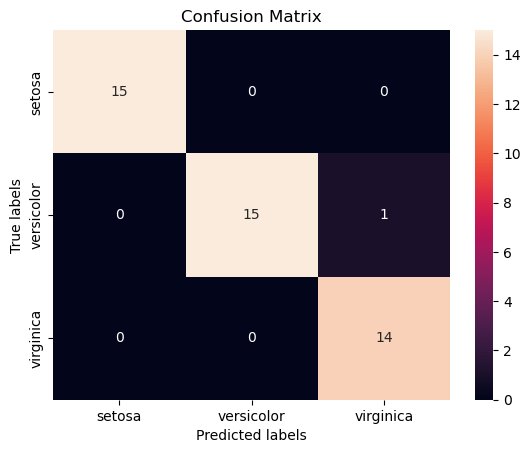

In [23]:
sns.heatmap(cm,xticklabels = iris.target_names, yticklabels = iris.target_names, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')